# FINAL PROJECT
### Emily Bederov - 215025255, Shira lavi- & Noam Farhi-

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/EmilyBederov/FINAL-PROJECT---TOMATO-YIELD/main/tomatoes.csv')

In [59]:
df.head()

id  Average Plant Size  Bee_1 Pollination Activity  \
0   0                25.0                        0.50   
1   1                25.0                        0.50   
2   2                12.5                        0.25   
3   3                12.5                        0.25   
4   4                25.0                        0.50   

   bee_2 Pollination Activity  bee_3 Pollination Activity  \
0                        0.25                        0.75   
1                        0.25                        0.50   
2                        0.25                        0.63   
3                        0.25                        0.63   
4                        0.25                        0.63   

   bee_4 Pollination Activity  Maximum Upper Bloom Temperature  \
0                        0.50                             69.7   
1                        0.50                             69.7   
2                        0.63                             86.0   
3                        0.50                             77.4   
4                        0.63                             77.4   

   Minimum Upper Bloom Temperature Average Upper Bloom Temperature  \
0                             42.1                            58.2   
1                             42.1                            58.2   
2                             52.0                            71.9   
3                             46.8                            64.7   
4                             46.8                            64.7   

   Maximum Lower Bloom Temperature  Minimum Lower Bloom Temperature  \
0                             50.2                             24.3   
1                             50.2                             24.3   
2                             62.0                             30.0   
3                             55.8                             27.0   
4                             55.8                             27.0   

   Average Lower Bloom Temperature  Total Rainy Days  \
0                             41.2              24.0   
1                             41.2              24.0   
2                             50.8              24.0   
3                             45.8              24.0   
4                             45.8              24.0   

   Proportion of Rainy Days  fruit_set  mass_of_fruit  average_seeds  \
0                      0.39   0.425011       0.417545      32.460887   
1                      0.39   0.444908       0.422051      33.858317   
2                      0.39   0.552927       0.470853      38.341781   
3                      0.39   0.565976       0.478137      39.467561   
4                      0.39   0.579677       0.494165      40.484512   

   tomato_yield  
0    4476.81146  
1    5548.12201  
2    6869.77760  
3    6880.77590  
4    7479.93417

## Lets explore our Data Types

In [60]:
df.dtypes

id                                   int64
Average Plant Size                 float64
Bee_1 Pollination Activity         float64
bee_2 Pollination Activity         float64
bee_3 Pollination Activity         float64
bee_4 Pollination Activity         float64
Maximum Upper Bloom Temperature    float64
Minimum Upper Bloom Temperature    float64
Average Upper Bloom Temperature     object
Maximum Lower Bloom Temperature    float64
Minimum Lower Bloom Temperature    float64
Average Lower Bloom Temperature    float64
Total Rainy Days                   float64
Proportion of Rainy Days           float64
fruit_set                          float64
mass_of_fruit                      float64
average_seeds                      float64
tomato_yield                       float64
dtype: object

### lets check "Average Upper Bloom Temperature"

In [61]:
df["Average Upper Bloom Temperature"]

0        58.2
1        58.2
2        71.9
3        64.7
4        64.7
         ... 
15284    64.7
15285    71.9
15286    64.7
15287    58.2
15288    64.7
Name: Average Upper Bloom Temperature, Length: 15289, dtype: object

## We can sense a problem -> the data looks nomarical -> 
## lets check for "MISSING DATA"
[Effective Strategies for Handling Missing Values in Data Analysis](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/)

In [62]:
def find_missing(df):
    missing_values = []
    for column in df.columns:
        missing_in_column = df[column] == 'missing'
        if missing_in_column.any():
            for row in missing_in_column[missing_in_column].index:
                missing_values.append((row, column))
                
    return missing_values

missing_val = find_missing(df)

for row, column in missing_val:
    print(f'Missing values found at Row: {row}, Column: {column}')

Missing values found at Row: 1052, Column: Average Upper Bloom Temperature
Missing values found at Row: 3056, Column: Average Upper Bloom Temperature
Missing values found at Row: 3067, Column: Average Upper Bloom Temperature
Missing values found at Row: 4728, Column: Average Upper Bloom Temperature
Missing values found at Row: 4743, Column: Average Upper Bloom Temperature


### There are 5 missing values -> We'll handle them:
* we'll use - Mean Imputation
* [ML | Handling Missing Values](https://www.geeksforgeeks.org/ml-handling-missing-values/?ref=lbp)
-> The approach we chose from the article above is to use fillna() : Fills missing values with specific values, means, medians, or other calculated values.
* [pandas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In [63]:
df["Average Upper Bloom Temperature"] = df["Average Upper Bloom Temperature"].replace('missing', np.nan)
#check replacment
print(df["Average Upper Bloom Temperature"].isna().sum())

5


In [64]:
#change & check data type
df["Average Upper Bloom Temperature"] = pd.to_numeric(df["Average Upper Bloom Temperature"], errors='coerce')
print(df["Average Upper Bloom Temperature"].dtypes)

float64


In [65]:
#replace nan values with method -> mean imputation
mean_value = df["Average Upper Bloom Temperature"].mean()
df["Average Upper Bloom Temperature"] = df["Average Upper Bloom Temperature"].fillna(mean_value)

In [66]:
print(df["Average Upper Bloom Temperature"].isna().sum())

0


# Numerical and Categorical varibles
[Categorical Data vs Numerical Data: The Differences](https://www.questionpro.com/blog/categorical-data-vs-numerical-data/)

* Numerical data - includes numbers -> int, float
* Categorical data - includes objects, strings -> exclude: int, float
* but as we saw when we have objects we need to check them ->
## IN TOTAL OUR DATA IS ALL NUMERICAL

In [67]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Number of Numerical variables: {len(numerical_vars)}")

Number of Numerical variables: 18


# LETS ANALYAZE STATISTICS OF OUR DATA
### why to choose describe() method?

1. count - refers to the number of non-null entries in each column, which they represent the valid data in the Dataset.
2. mean - refers to the avarage of the non-null values in the dataset.
3. standard deviation - Describes how much the data points spread out or vary from the average.
4. min - smallest value in each collumn
5. max - largest values in each collumn
6. upper 50 percentiles -> lower percentile is 25 - The value below which 25% of the data falls.
7. median -  the value that separates the higher half from the lower half of the data set.
8. lower 50 percentiles -> upper percentile is 75 - The value below which 75% of the data falls.
   

In [68]:
Statistics_summary = df.describe()
Statistics_summary

id  Average Plant Size  Bee_1 Pollination Activity  \
count  15289.000000        15289.000000                15289.000000   
mean    7644.000000           19.704690                    0.389314   
std     4413.698468            6.595211                    0.361643   
min        0.000000           10.000000                    0.000000   
25%     3822.000000           12.500000                    0.250000   
50%     7644.000000           25.000000                    0.500000   
75%    11466.000000           25.000000                    0.500000   
max    15288.000000           40.000000                   18.430000   

       bee_2 Pollination Activity  bee_3 Pollination Activity  \
count                15289.000000                15289.000000   
mean                     0.286768                    0.492675   
std                      0.059917                    0.148115   
min                      0.000000                    0.000000   
25%                      0.250000                    0.380000   
50%                      0.250000                    0.500000   
75%                      0.380000                    0.630000   
max                      0.585000                    0.750000   

       bee_4 Pollination Activity  Maximum Upper Bloom Temperature  \
count                15289.000000                     15289.000000   
mean                     0.592355                        82.147034   
std                      0.139489                         9.363749   
min                      0.000000                      -100.000000   
25%                      0.500000                        77.400000   
50%                      0.630000                        86.000000   
75%                      0.750000                        86.000000   
max                      0.750000                        94.600000   

       Minimum Upper Bloom Temperature  Average Upper Bloom Temperature  \
count                     15289.000000                     15289.000000   
mean                         49.673281                        68.656104   
std                           5.546405                         7.640290   
min                          39.000000                        58.200000   
25%                          46.800000                        64.700000   
50%                          52.000000                        71.900000   
75%                          52.000000                        71.900000   
max                          57.200000                        79.000000   

       Maximum Lower Bloom Temperature  Minimum Lower Bloom Temperature  \
count                     15289.000000                     15289.000000   
mean                         59.229538                        28.660553   
std                           6.610640                         3.195367   
min                          50.200000                        24.300000   
25%                          55.800000                        27.000000   
50%                          62.000000                        30.000000   
75%                          62.000000                        30.000000   
max                          68.200000                        33.000000   

       Average Lower Bloom Temperature  Total Rainy Days  \
count                     15289.000000      15289.000000   
mean                         48.568500         18.660865   
std                           5.390545         11.657582   
min                          41.200000          1.000000   
25%                          45.800000         16.000000   
50%                          50.800000         16.000000   
75%                          50.800000         24.000000   
max                          55.900000         34.000000   

       Proportion of Rainy Days     fruit_set  mass_of_fruit  average_seeds  \
count              15289.000000  15289.000000   15289.000000   15289.000000   
mean                   0.324176      0.502741       0.446553      36.164950   
std                    0.16390

## Visualization of our features:

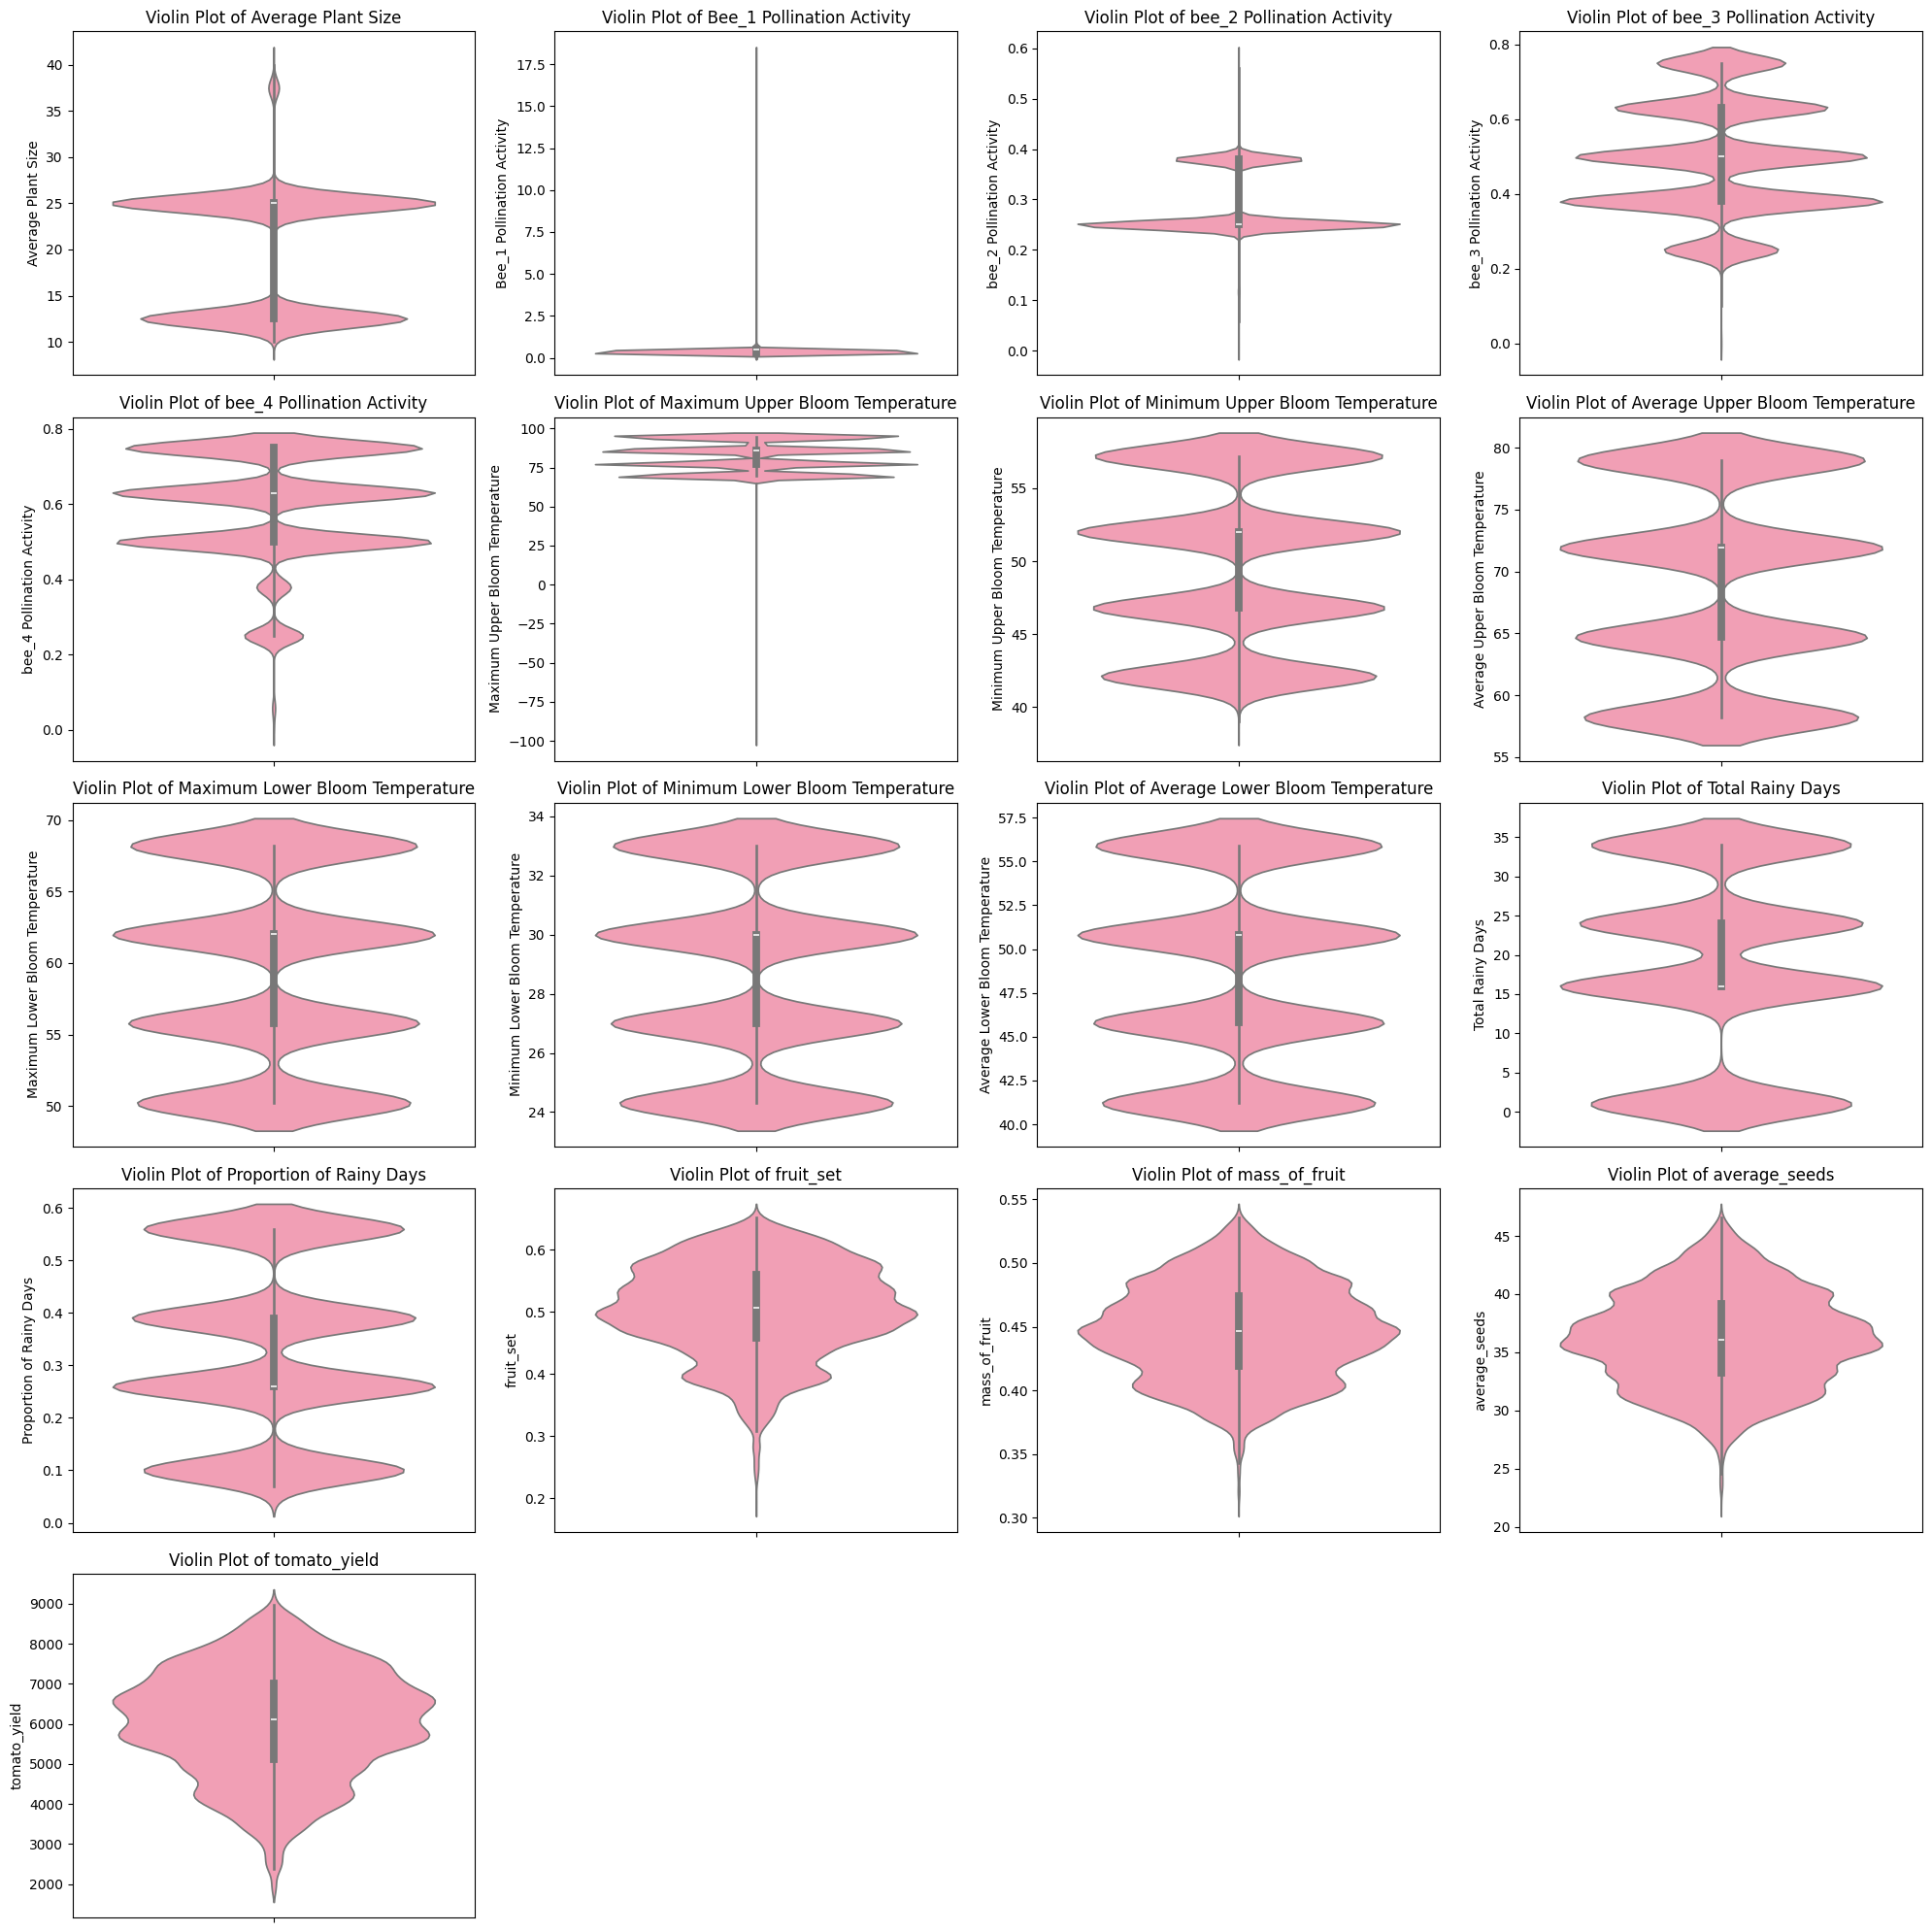

In [69]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))  

axes = axes.flatten()

for i, column in enumerate(df.columns[1:18]):  # Adjust the slice to include the columns you're interested in
    sns.violinplot(y=df[column], ax=axes[i], color = '#ff91af')
    axes[i].set_title(f'Violin Plot of {column}')

# If there are fewer plots than subplots, turn off the remaining axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## Analysis
* 
* 
*
*

# Correlation between variables
after handaling missing values lets check how our data is correlated

In [70]:
correlation_matrix = df.corr()
tomato_yield_correlations = correlation_matrix['tomato_yield']
tomato_yield_correlations

id                                 0.000975
Average Plant Size                -0.382619
Bee_1 Pollination Activity        -0.118001
bee_2 Pollination Activity         0.161145
bee_3 Pollination Activity         0.073969
bee_4 Pollination Activity         0.198264
Maximum Upper Bloom Temperature   -0.021274
Minimum Upper Bloom Temperature   -0.021929
Average Upper Bloom Temperature   -0.021401
Maximum Lower Bloom Temperature   -0.022197
Minimum Lower Bloom Temperature   -0.022319
Average Lower Bloom Temperature   -0.022081
Total Rainy Days                  -0.477191
Proportion of Rainy Days          -0.483870
fruit_set                          0.885967
mass_of_fruit                      0.826481
average_seeds                      0.868853
tomato_yield                       1.000000
Name: tomato_yield, dtype: float64

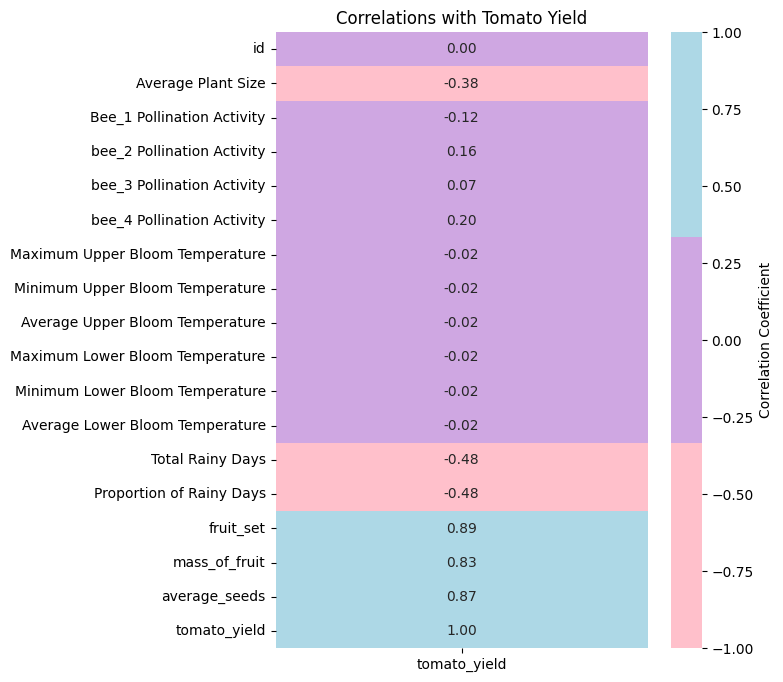

In [71]:
#HEATMAP -> WITH RELATION TOO TOMATO YIELD
colors = ["pink", "#cfa7e2", "lightblue"]
correlation_matrix = df.corr()

tomato_yield_correlations = correlation_matrix[['tomato_yield']]  

plt.figure(figsize=(6, 8))  # Adjusted for a single column
heatmap = sns.heatmap(tomato_yield_correlations, annot=True, cmap= colors, vmin=-1, vmax=1, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
heatmap.set_title('Correlations with Tomato Yield')
plt.show()

## Correlations:

* Understanding Correlation Coefficients:
Many programs used for statistics can calculate a correlation coefficient, which is a number that shows how closely related two variables are.
What does the coefficient mean?
A correlation coefficient can range from -1 to 1.
If the coefficient is close to 1, it means there's a strong positive relationship between the two variables. This means if one increases, the other tends to increase too.
If the coefficient is close to -1, it indicates a strong negative relationship, meaning if one variable goes up, the other tends to go down.
A coefficient close to 0 means there isn't a straight-line relationship between the variables.

* Important notes:
Just because two things are related does not mean one causes the other. Sometimes, another factor you haven’t considered might be influencing both.
Even if there is a cause-and-effect link, the correlation won't tell you which variable causes the other.
A coefficient near 0 doesn’t mean there’s no relationship at all. It just means they don't move together in a straight line. There could be another type of relationship, like a curve.


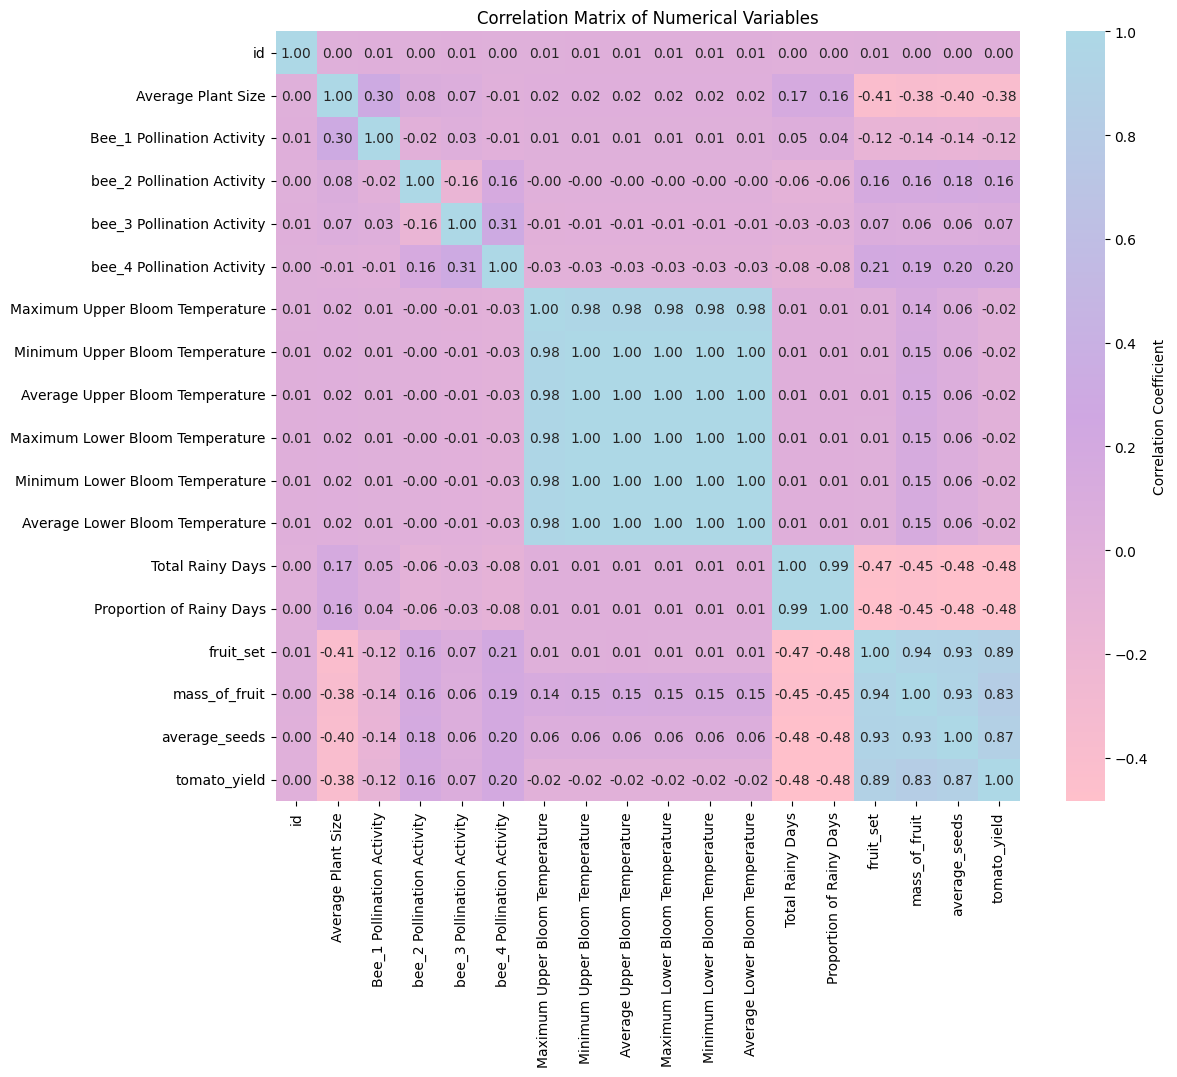

In [72]:
#HEATMAP -> CORRELATION OF ALL NUMERICAL VARIBLES
from matplotlib.colors import LinearSegmentedColormap
colors = ["pink", "#cfa7e2", "lightblue"]  # Define the colors
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Plot the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, cbar_kws={'label': 'Correlation Coefficient'})
heatmap.set_title('Correlation Matrix of Numerical Variables')
plt.show()

# Visualization of our Data in Relation to tomato yeild

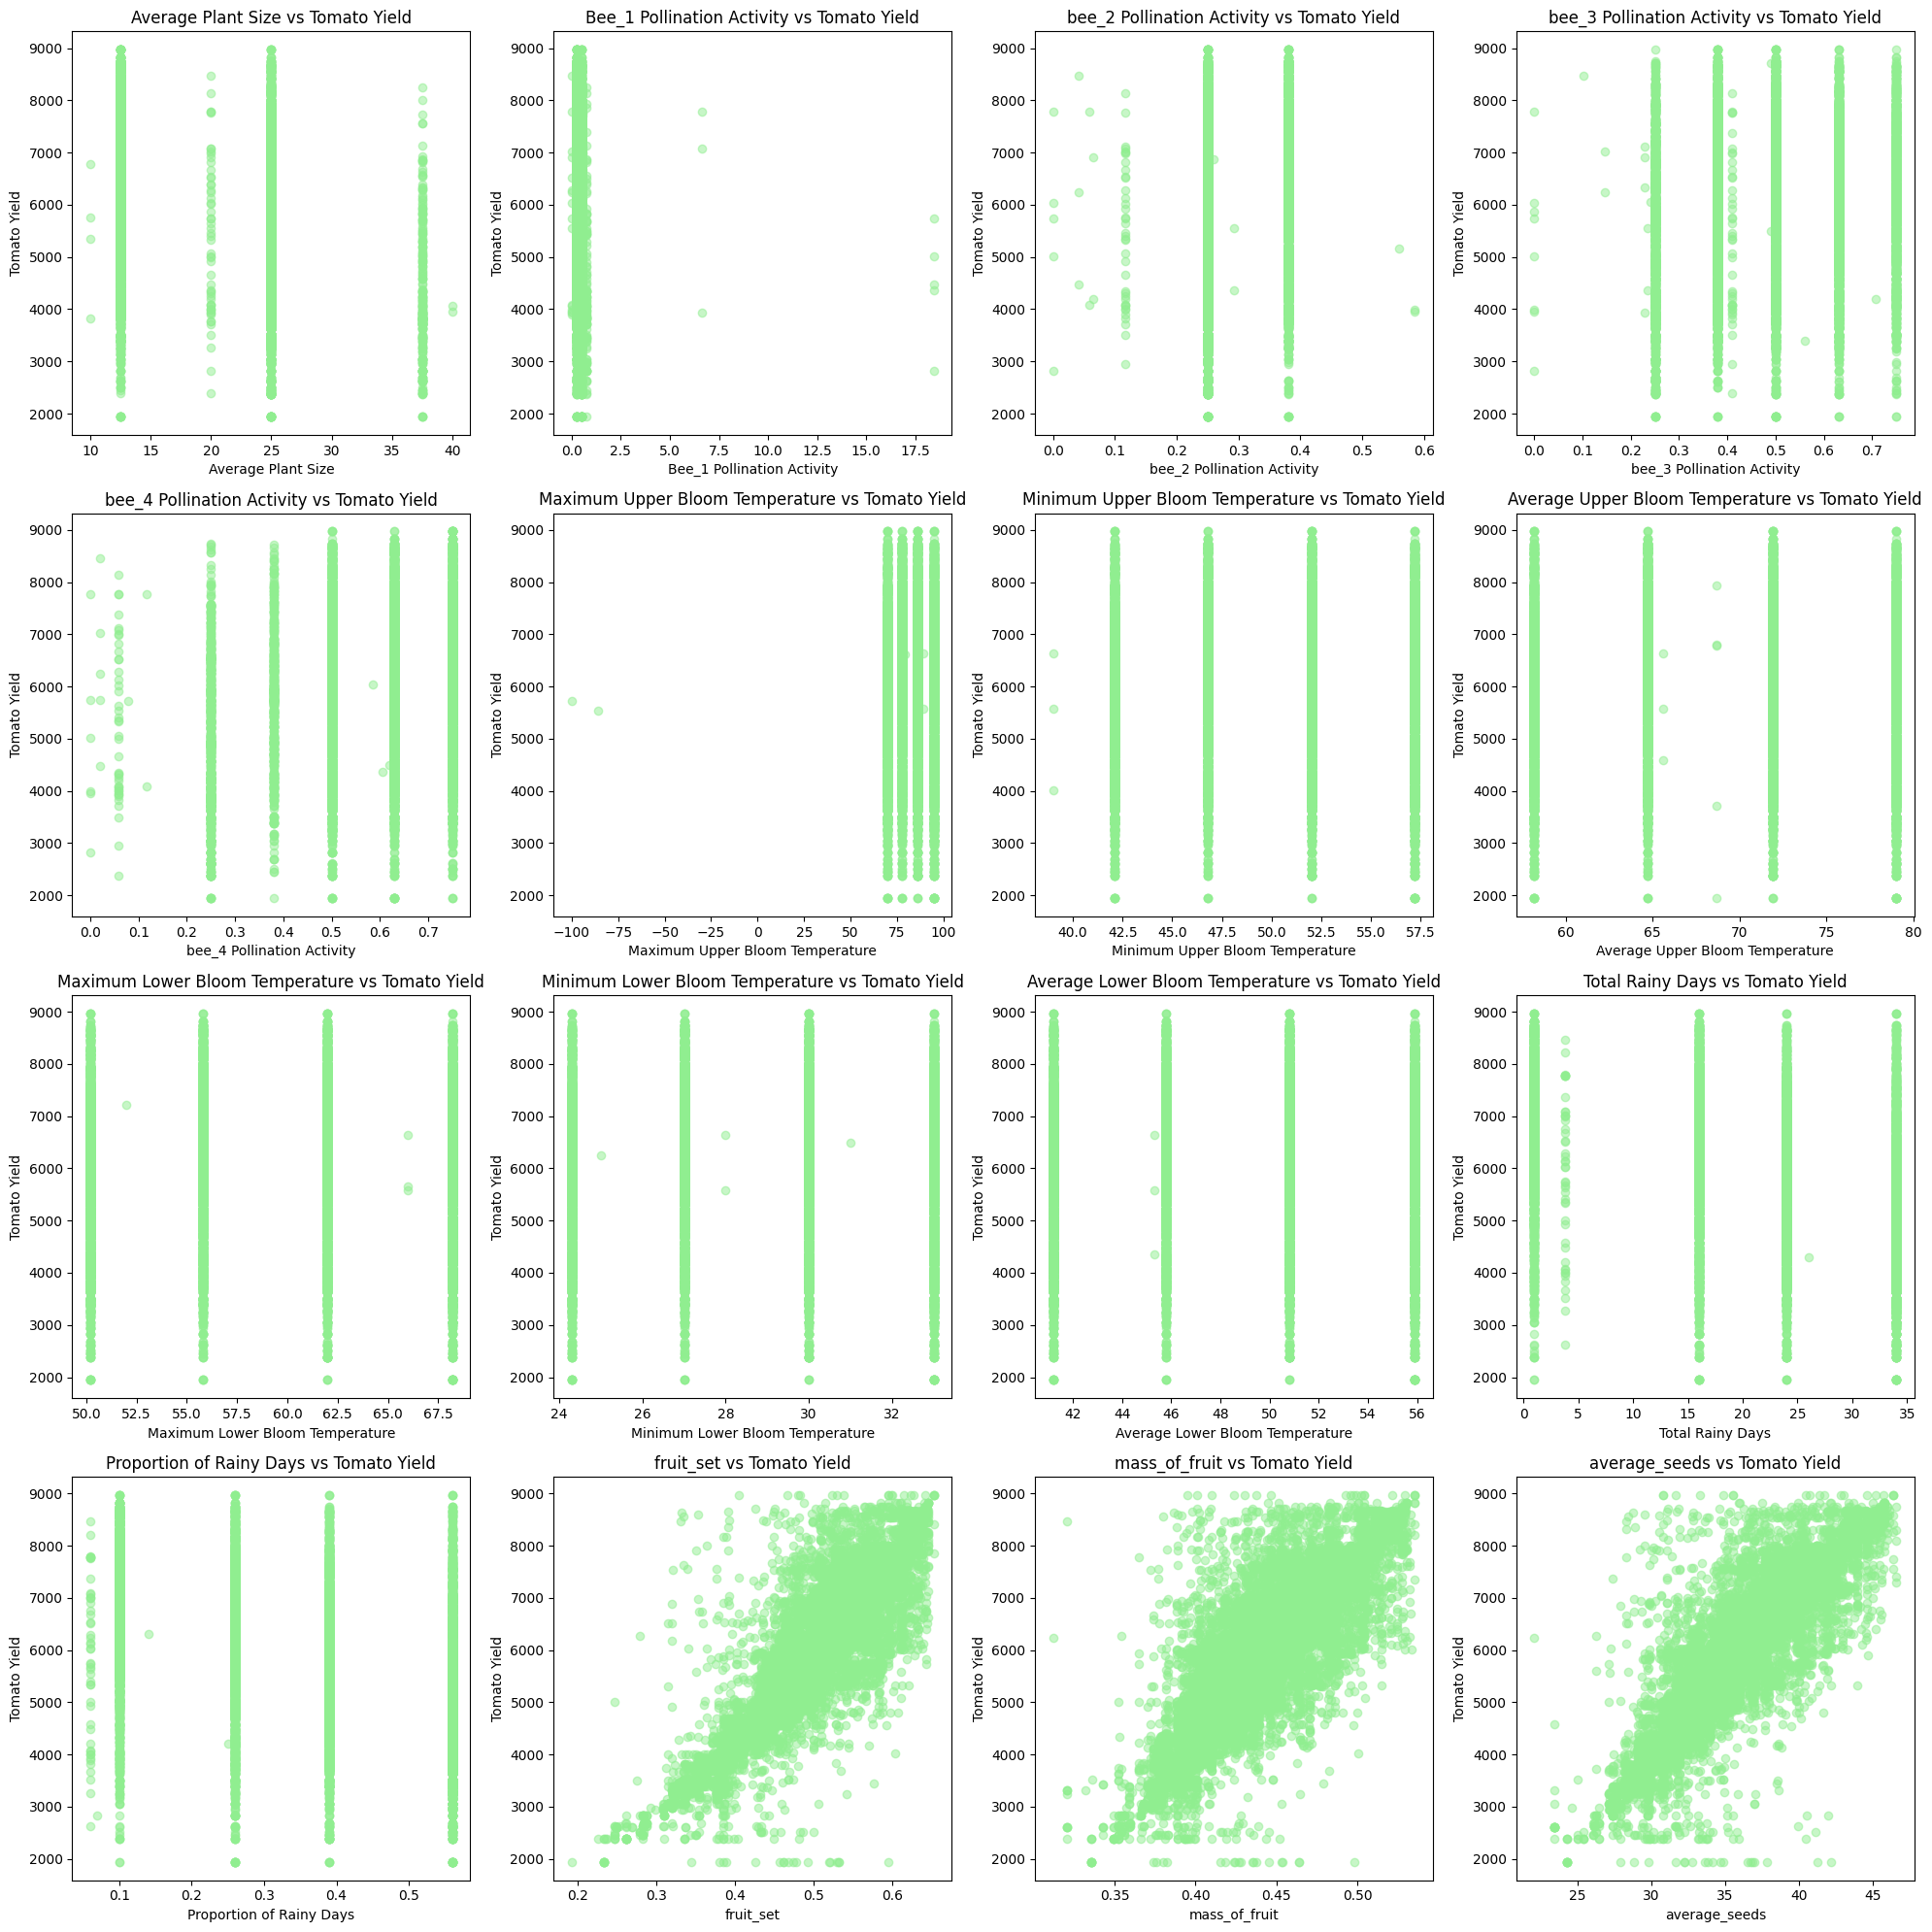

In [73]:
features = df.columns.drop(['tomato_yield', 'id'])

rows = (len(features) + 3) // 4 
fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(20, rows * 5))
axes = axes.flatten()  

# Plotting each feature against tomato_yield
for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['tomato_yield'], alpha=0.5, color="#90ee90")
    axes[i].set_title(f'{feature} vs Tomato Yield')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Tomato Yield')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# Insights from visualization and correlation:
* ### Pollination Activity - Bee_1, Bee_2, Bee_3, Bee_4 :
  * correlations: -0.12 to 0.2
  * we can learn that this data is reletavily low with tomato yield.
* ### Temperature Variables - Maximum, Minimum, Average :
  * correlations: -0.2
  * These plots indicate that yields are relatively consistent across a wide range of temperatures, This suggests that temperature
    changes don’t have a big impact on how many tomatoes are produced.
* ### Rainy Days - Total and Proportion :
  * correlations: -0.48
  * The data doesn’t show a clear connection between the number of rainy days and the amount of tomatoes produced. This might suggest that the amount of rain doesn’t really affect the yield,
* ### Fruit Set, Mass of Fruit, Average Seeds :
  * correlations: 0.89, 0.83, 0.87
  * Here we can see a strong correlation, indicates that these factors are important for getting more tomatoes.

# Outliers and Normalized data
An Outlier is a data item/object that deviates significantly from the rest of the (so-called normal) objects. Identifying outliers is important in statistics and data analysis because they can have a significant impact on the results of statistical analyses. The analysis for outlier detection is referred to as outlier mining.

#### Sources:
*  -> [Detect and Remove the Outliers using Python](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/)
*  -> [Detecting and Treating Outliers | Treating the odd one out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

![boxplot](https://raw.githubusercontent.com/EmilyBederov/FINAL-PROJECT---TOMATO-YIELD/main/boxplot.png)

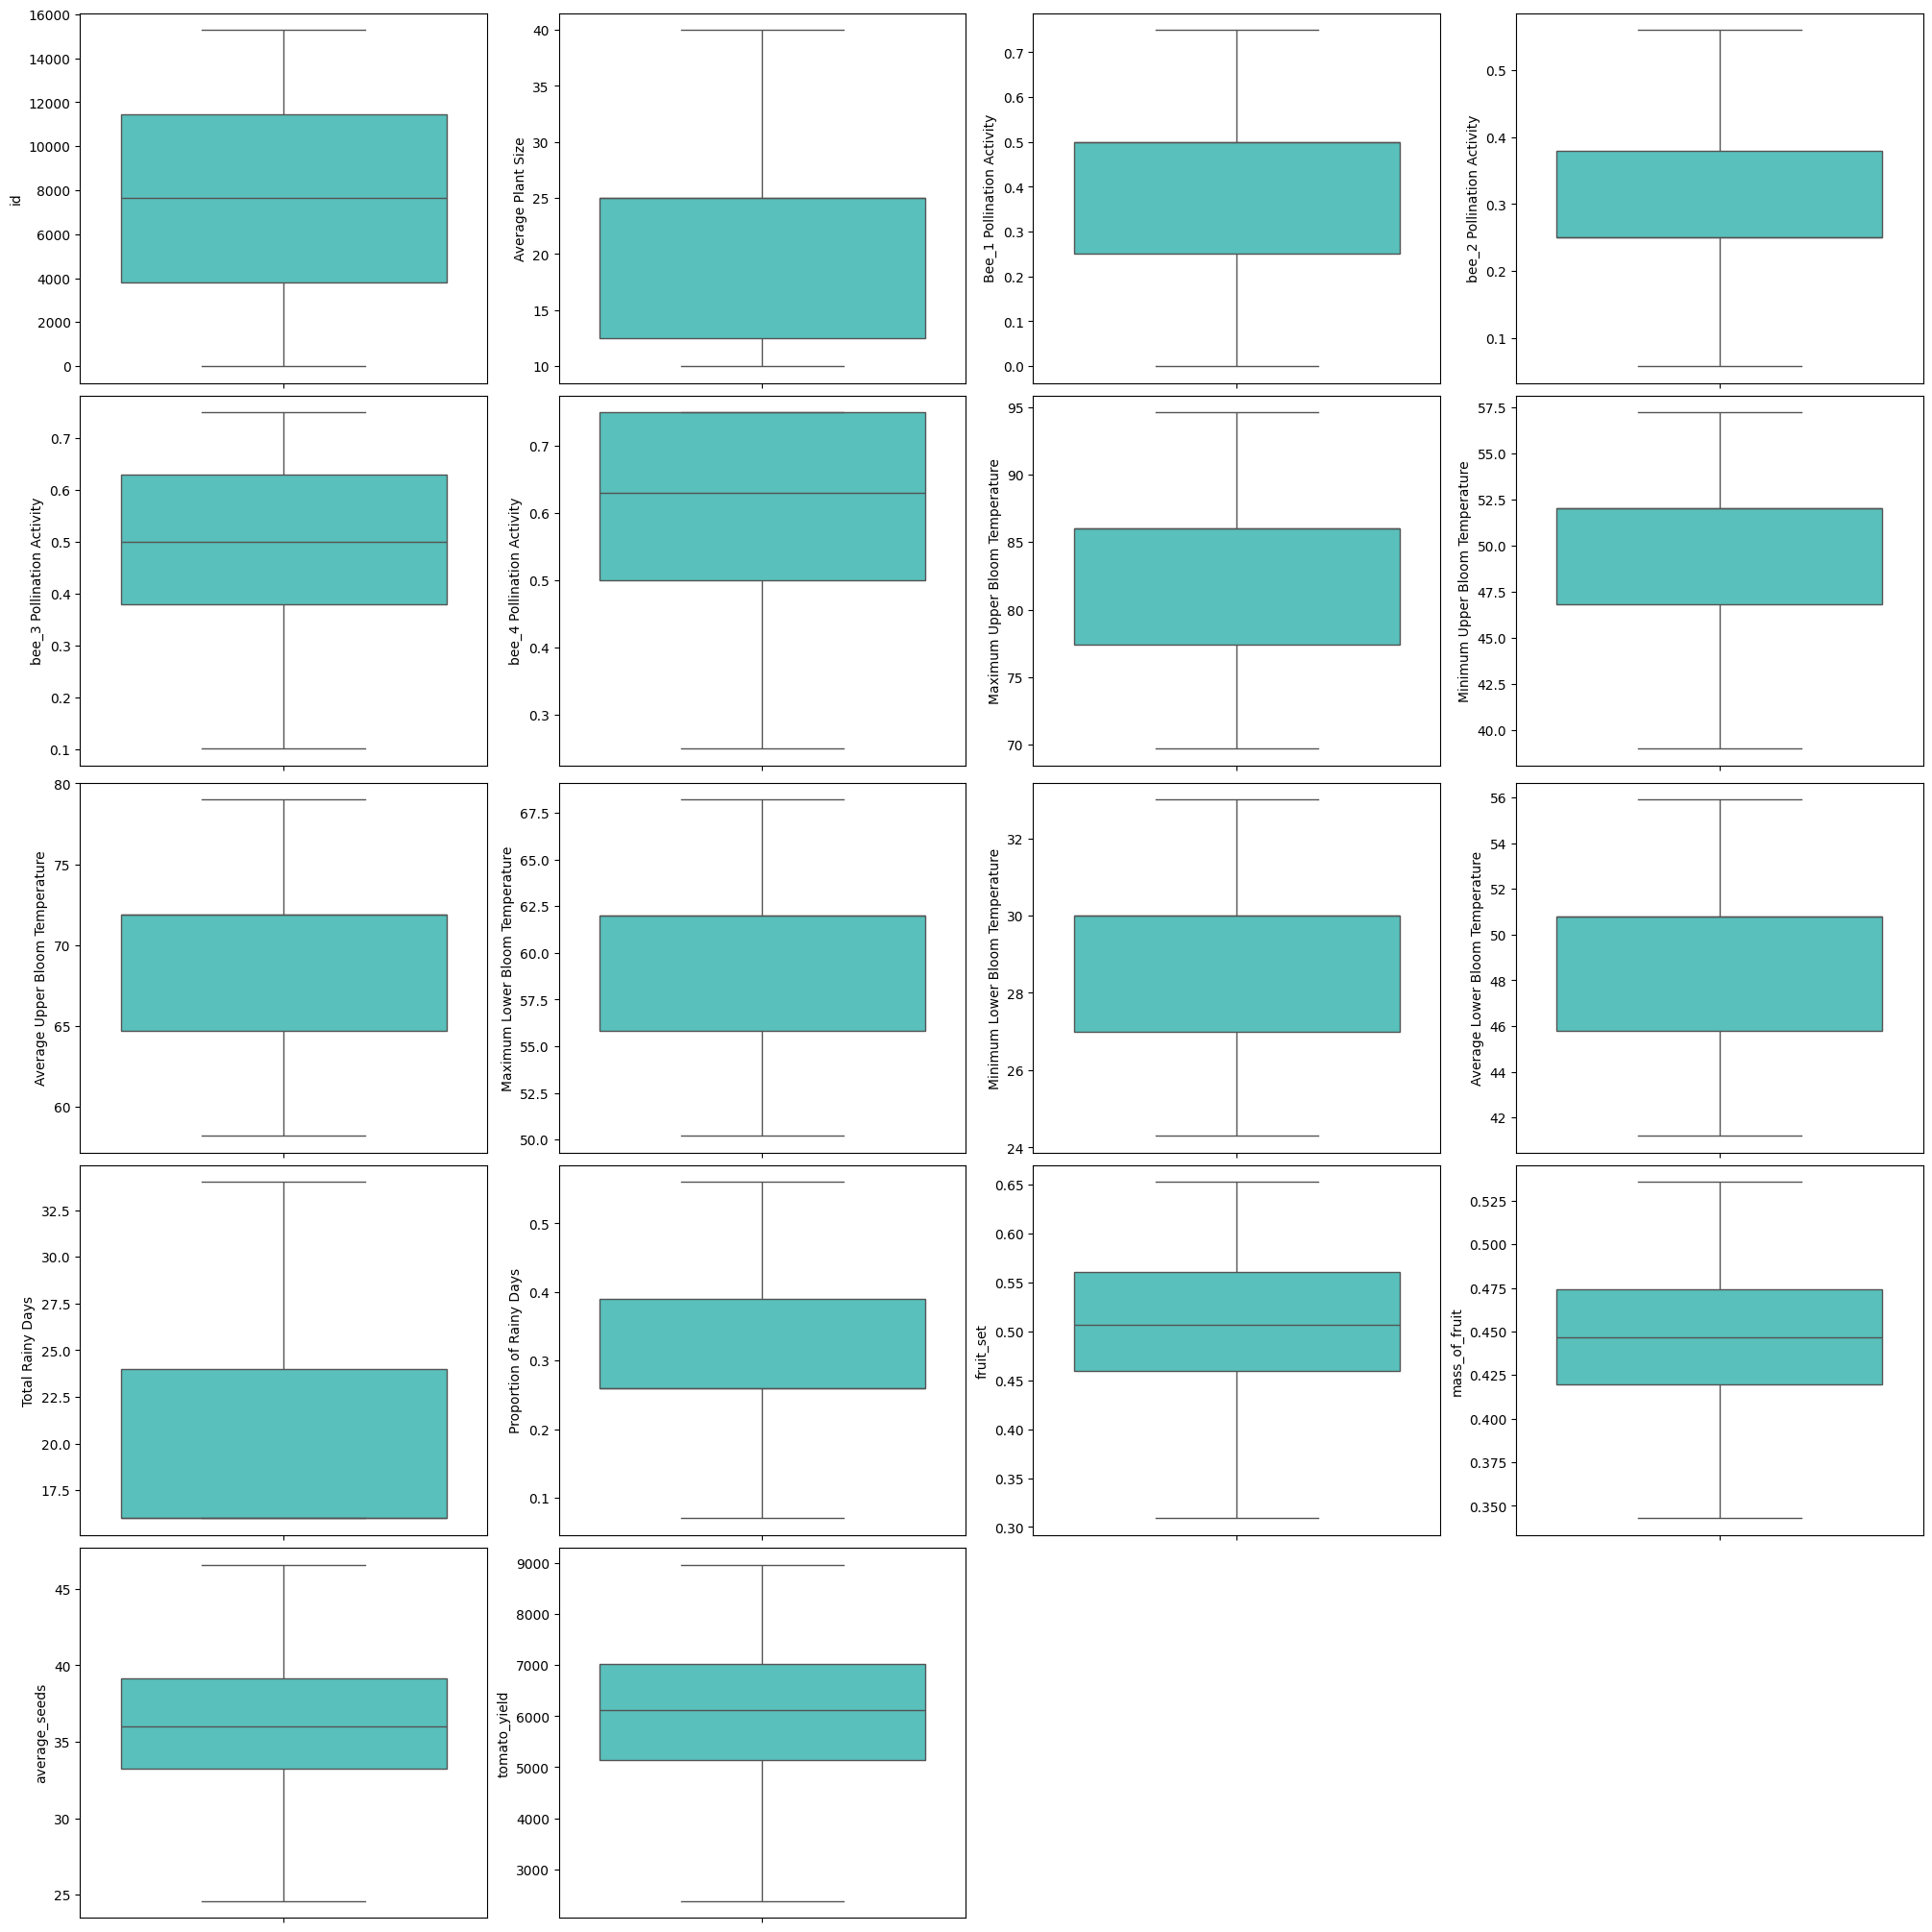

In [80]:
#Box Plot
num_plots = len(df.columns)
n_cols = 4  # Set to 4 columns per row
n_rows = (num_plots + n_cols - 1) // n_cols  # Calculate rows needed for 4 columns per row

# Set the figure size for the whole grid, adjusted for 4 graphs per row
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten() if n_rows > 1 else [axes]

# Plot each column on its own subplot and set y-axis labels
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i], color = '#48D1CC')
    axes[i].set_ylabel(col)  # Set y-axis label to the column name

# Hide any unused subplot axes
for j in range(num_plots, len(axes)):
    axes[j].set_visible(False)

plt.show()

### IQR METHOD - 
The Interquartile Range (IQR) quantifies the spread of the middle 50% of a dataset and is calculated by finding the difference between the third quartile (Q3) and the first quartile (Q1). The first quartile marks the median of the lower half of the data, and the third quartile marks the median of the upper half. The IQR, thus, describes the range within which the bulk of the data lies and is particularly useful because it is less influenced by outliers than other measures such as the mean or standard deviation, making it a reliable indicator of data variability.

In [75]:
def detect_outliers_iqr(df):
    outlier_dict = {}  # To store outliers and their counts for each column
    for column in df.columns:  
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR

        # Identifying outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        if not outliers.empty:
            outlier_dict[column] = {'outliers': outliers.tolist(), 'count': len(outliers)}
        else:
            outlier_dict[column] = {'outliers': "No outliers detected", 'count': 0}

    return outlier_dict

outliers_dict = detect_outliers_iqr(df)

print("Number of Outliers from IQR method:")
for column, info in outliers_dict.items():
    print(f"{column}: {info['count']}")

# Ask the user if they want to see the outliers
user_input = input("Do you want to see the outliers for each column? (yes/no): ").strip().lower()

if user_input == "yes":
    for column, info in outliers_dict.items():
        print(f"Outliers from IQR method for {column}: {info}")
else:
    print("Outliers display skipped.")


Number of Outliers from IQR method:
id: 0
Average Plant Size: 0
Bee_1 Pollination Activity: 8
bee_2 Pollination Activity: 10
bee_3 Pollination Activity: 8
bee_4 Pollination Activity: 56
Maximum Upper Bloom Temperature: 2
Minimum Upper Bloom Temperature: 0
Average Upper Bloom Temperature: 0
Maximum Lower Bloom Temperature: 0
Minimum Lower Bloom Temperature: 0
Average Lower Bloom Temperature: 0
Total Rainy Days: 3569
Proportion of Rainy Days: 49
fruit_set: 97
mass_of_fruit: 23
average_seeds: 24
tomato_yield: 26


Do you want to see the outliers for each column? (yes/no):  no


Outliers display skipped.


In [76]:
def replace_outliers_with_median(dataframe):
    for column in dataframe.select_dtypes(include=[np.number]).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = dataframe[column].median()
        dataframe[column] = np.where((dataframe[column] < lower_bound) | (dataframe[column] > upper_bound),
                                     median, dataframe[column])
    return dataframe
df_cleaned = replace_outliers_with_median(df)

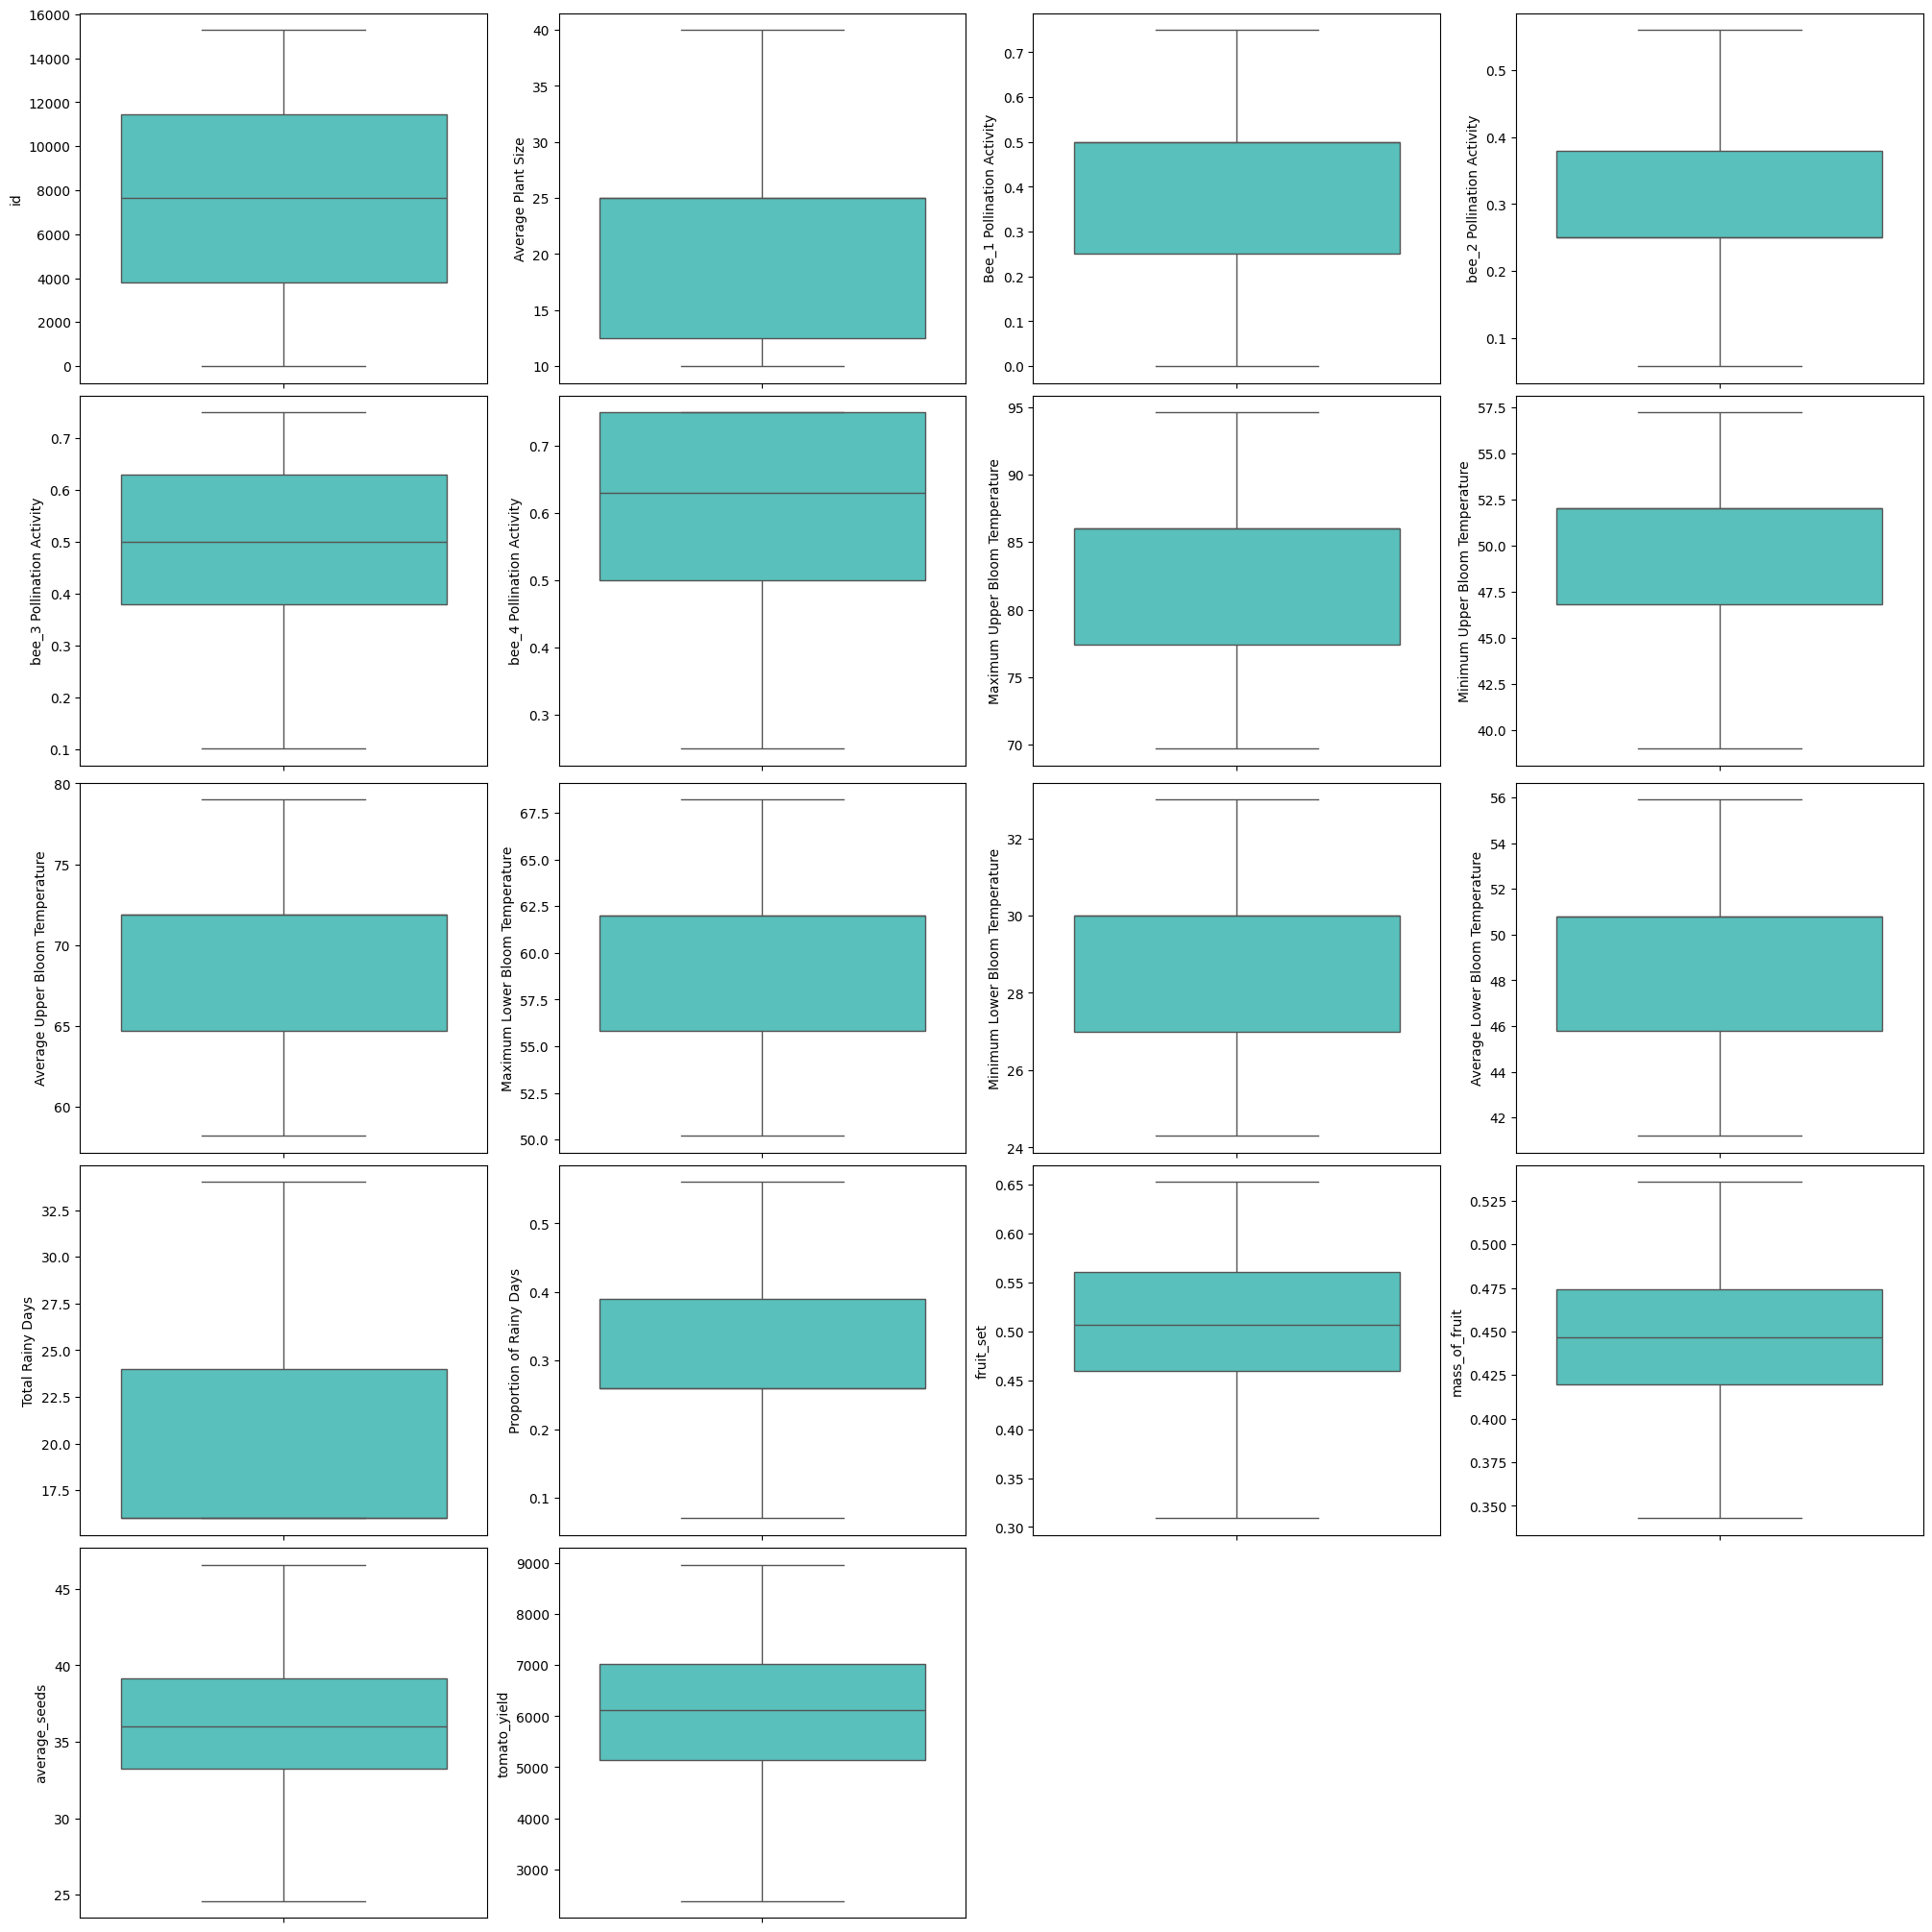

In [81]:
#Box Plot
num_plots = len(df_cleaned.columns)
n_cols = 4  # Set to 4 columns per row
n_rows = (num_plots + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)

axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i], color = '#48D1CC')
    axes[i].set_ylabel(col)  

# Hide any unused subplot axes
for j in range(num_plots, len(axes)):
    axes[j].set_visible(False)

plt.show()

### we can see in out BoxPlots -> There are no more outlers in our data -> Lets continue

# Normalization
[How to Use StandardScaler and MinMaxScaler Transforms in Python](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)

In [82]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled)

[[0.00000000e+00 5.00000000e-01 6.66666667e-01 ... 3.87480959e-01
  3.57504245e-01 3.18219489e-01]
 [6.54107797e-05 5.00000000e-01 6.66666667e-01 ... 4.10848007e-01
  4.21071856e-01 4.80798000e-01]
 [1.30821559e-04 8.33333333e-02 3.33333333e-01 ... 6.63921901e-01
  6.25019899e-01 6.81368038e-01]
 ...
 [9.99869178e-01 5.00000000e-01 6.66666667e-01 ... 3.83540589e-01
  3.50142853e-01 3.51550181e-01]
 [9.99934589e-01 5.00000000e-01 6.66666667e-01 ... 4.73498004e-01
  5.49165334e-01 6.66671296e-01]
 [1.00000000e+00 5.00000000e-01 6.66666667e-01 ... 5.38026189e-01
  4.77315111e-01 5.29341193e-01]]


## Using Z-Score we'll detact outleirs

In [84]:
# Initialize an empty dictionary to store outliers for each column
outliers_dict = {}

def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > thres:
            outliers.append(i)
    return outliers

print(" Number of Outliers from Z-scores method for:")
for column in df.columns:
    sample_outliers = detect_outliers_zscore(df[column])
    outliers_dict[column] = sample_outliers
    print(f" {column}: {len(sample_outliers)}")

# Ask the user if they want to see the outliers
user_input = input(" Do you want to see the outliers for each column? (yes/no): ").strip().lower()

if user_input == "yes":
    for column, outliers in outliers_dict.items():
        print(f"Outliers from Z-scores method for {column}: {outliers}")
else:
    print("Outliers display skipped.")

 Number of Outliers from Z-scores method for:
 id: 0
 Average Plant Size: 2
 Bee_1 Pollination Activity: 0
 bee_2 Pollination Activity: 5
 bee_3 Pollination Activity: 0
 bee_4 Pollination Activity: 0
 Maximum Upper Bloom Temperature: 0
 Minimum Upper Bloom Temperature: 0
 Average Upper Bloom Temperature: 0
 Maximum Lower Bloom Temperature: 0
 Minimum Lower Bloom Temperature: 0
 Average Lower Bloom Temperature: 0
 Total Rainy Days: 0
 Proportion of Rainy Days: 0
 fruit_set: 0
 mass_of_fruit: 0
 average_seeds: 0
 tomato_yield: 0


 Do you want to see the outliers for each column? (yes/no):  no


Outliers display skipped.


# Handaling outliers:

In [86]:
def replace_outliers_with_median(df, z_threshold=2):
    # Numeric columns to process
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Process each column
    for column_name in numeric_cols:
        mean = df[column_name].mean()
        std = df[column_name].std()
        z_scores = (df[column_name] - mean) / std
        
        median = df[column_name].median()
        df.loc[z_scores.abs() > z_threshold, column_name] = median
    
    return df

df_cleaned = replace_outliers_with_median(df)
print(df_cleaned.head())


    id  Average Plant Size  Bee_1 Pollination Activity  \
0  0.0                25.0                        0.50   
1  1.0                25.0                        0.50   
2  2.0                12.5                        0.25   
3  3.0                12.5                        0.25   
4  4.0                25.0                        0.50   

   bee_2 Pollination Activity  bee_3 Pollination Activity  \
0                        0.25                        0.75   
1                        0.25                        0.50   
2                        0.25                        0.63   
3                        0.25                        0.63   
4                        0.25                        0.63   

   bee_4 Pollination Activity  Maximum Upper Bloom Temperature  \
0                        0.50                             69.7   
1                        0.50                             69.7   
2                        0.63                             86.0   
3                   

In [87]:
df_cleaned = replace_outliers_with_median(df)
df_cleaned

id  Average Plant Size  Bee_1 Pollination Activity  \
0          0.0                25.0                        0.50   
1          1.0                25.0                        0.50   
2          2.0                12.5                        0.25   
3          3.0                12.5                        0.25   
4          4.0                25.0                        0.50   
...        ...                 ...                         ...   
15284  15284.0                12.5                        0.25   
15285  15285.0                12.5                        0.25   
15286  15286.0                25.0                        0.50   
15287  15287.0                25.0                        0.50   
15288  15288.0                25.0                        0.50   

       bee_2 Pollination Activity  bee_3 Pollination Activity  \
0                            0.25                        0.75   
1                            0.25                        0.50   
2                            0.25                        0.63   
3                            0.25                        0.63   
4                            0.25                        0.63   
...                           ...                         ...   
15284                        0.25                        0.38   
15285                        0.25                        0.25   
15286                        0.25                        0.38   
15287                        0.25                        0.63   
15288                        0.25                        0.63   

       bee_4 Pollination Activity  Maximum Upper Bloom Temperature  \
0                            0.50                             69.7   
1                            0.50                             69.7   
2                            0.63                             86.0   
3                            0.50                             77.4   
4                            0.63                             77.4   
...                           ...                              ...   
15284                        0.50                             77.4   
15285                        0.50                             86.0   
15286                        0.75                             77.4   
15287                        0.63                             69.7   
15288                        0.50                             77.4   

       Minimum Upper Bloom Temperature  Average Upper Bloom Temperature  \
0                                 42.1                             58.2   
1                                 42.1                             58.2   
2                                 52.0                             71.9   
3                                 46.8                             64.7   
4                                 46.8                             64.7   
...                                ...                              ...   
15284                             46.8                             64.7   
15285                             52.0                             71.9   
15286                             46.8                             64.7   
15287                             42.1                             58.2   
15288                             46.8                             64.7   

       Maximum Lower Bloom Temperature  Minimum Lower Bloom Temperature  \
0                                 50.2                             24.3   
1                                 50.2                             24.3   
2                                 62.0                             30.0   
3                                 55.8                             27.0   
4                                 55.8                             27.0   
...                                ...                              ...   
15284                             55.8                             27.0   
15285                             62.0                             30.0   
15286                

# Lets Check if our Dataset is indeed cleared using boxplot:

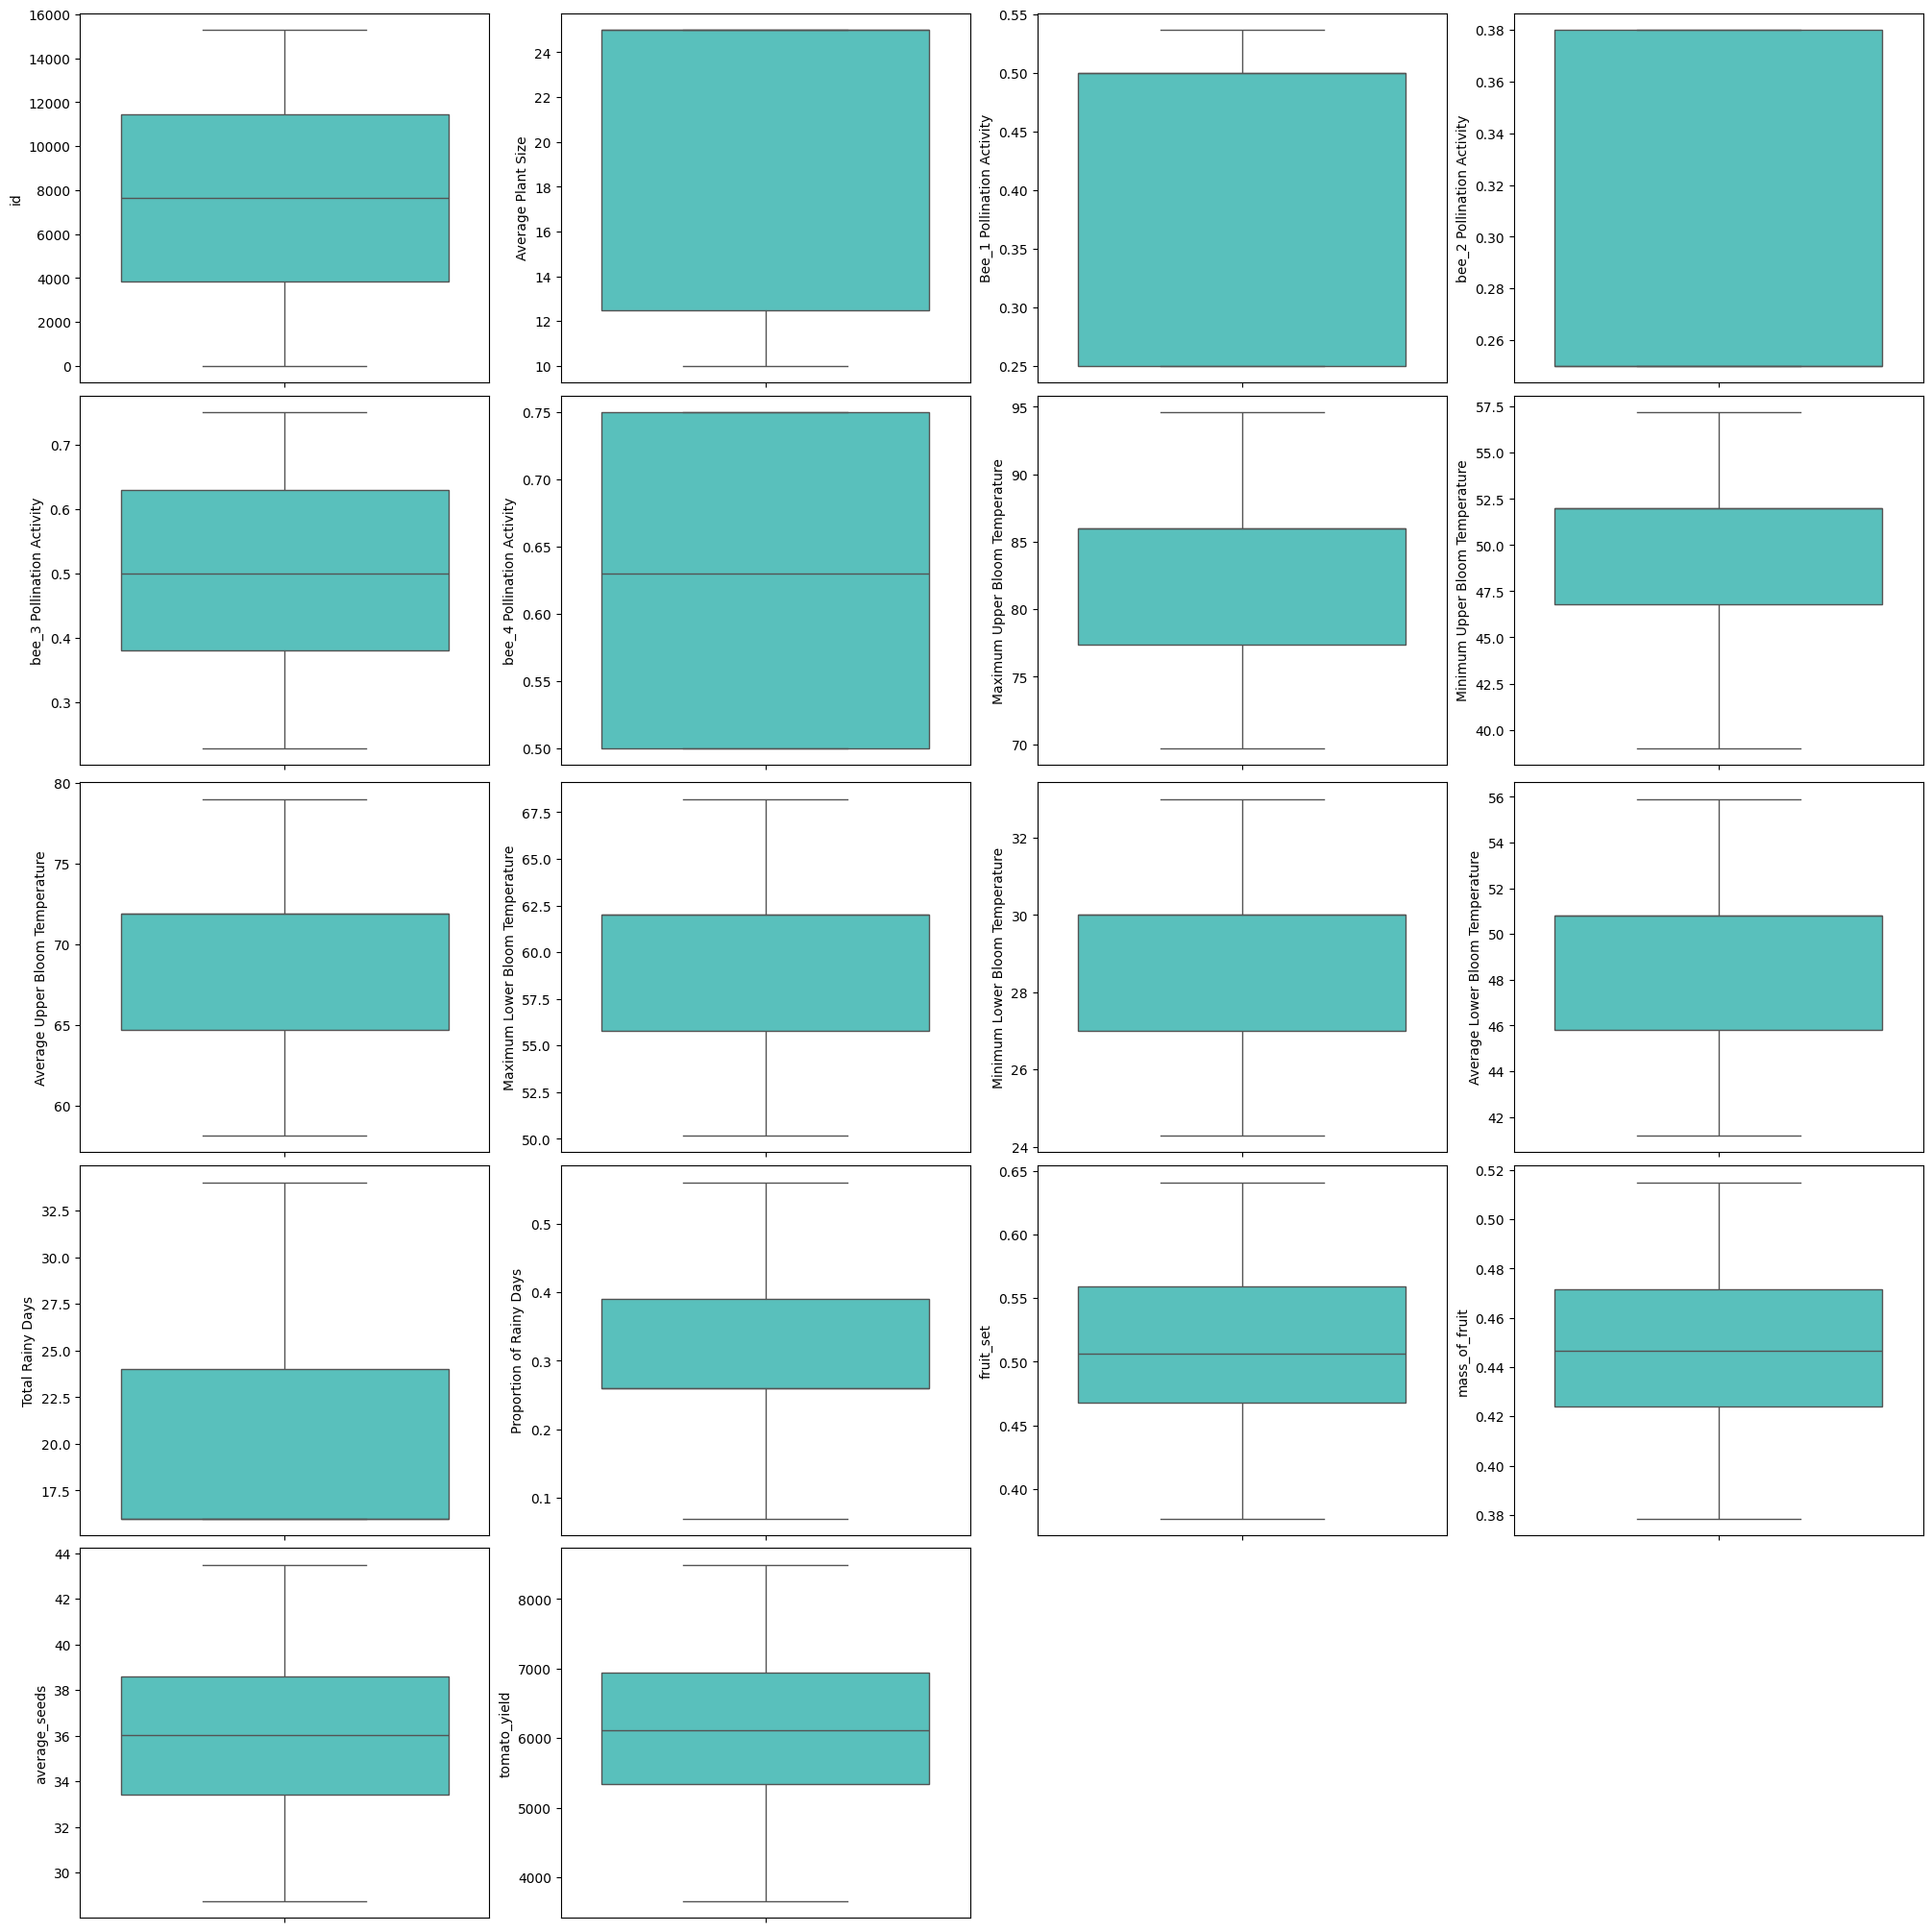

In [95]:
#Box Plot
num_plots = len(df_cleaned.columns)
n_cols = 4  # Set to 4 columns per row
n_rows = (num_plots + n_cols - 1) // n_cols  # Calculate rows needed for 4 columns per row

# Set the figure size for the whole grid, adjusted for 4 graphs per row
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten() if n_rows > 1 else [axes]

# Plot each column on its own subplot and set y-axis labels
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i], color = '#48D1CC')
    axes[i].set_ylabel(col)  # Set y-axis label to the column name

# Hide any unused subplot axes
for j in range(num_plots, len(axes)):
    axes[j].set_visible(False)

plt.show()

## Data visualization after normalizing:

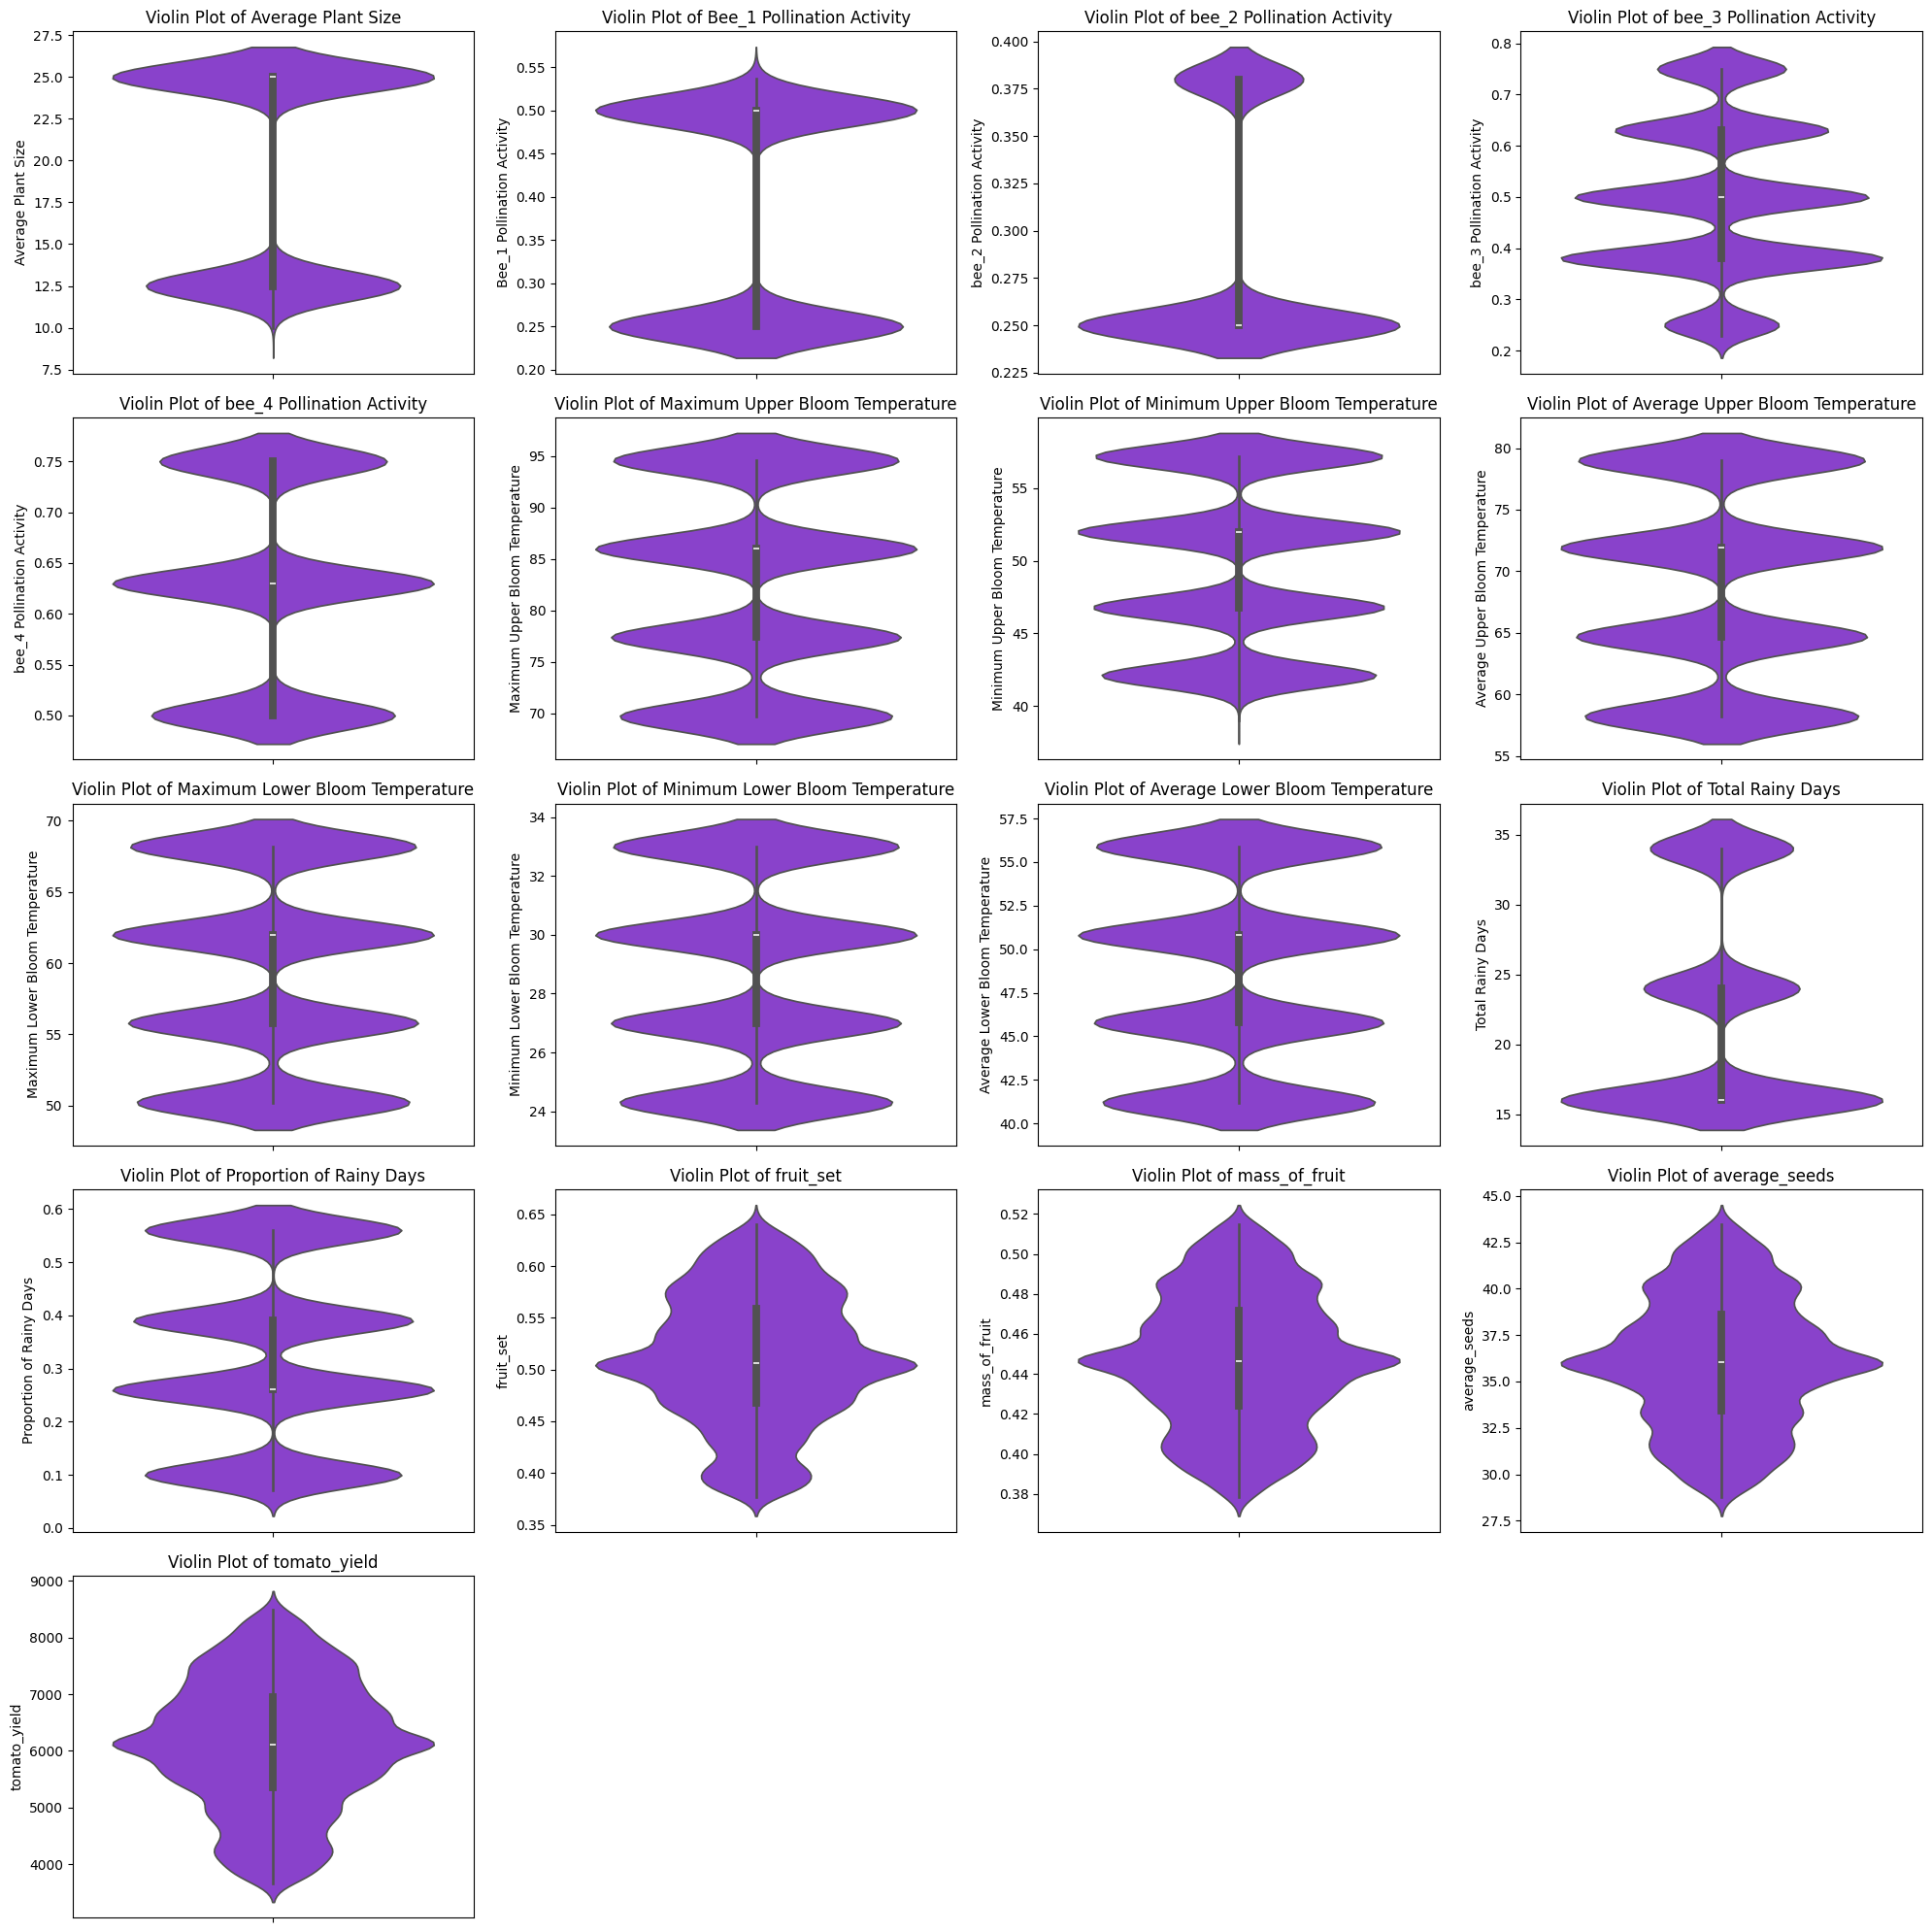

In [94]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))  

axes = axes.flatten()

for i, column in enumerate(df.columns[1:18]):  # Adjust the slice to include the columns you're interested in
    sns.violinplot(y=df[column], ax=axes[i], color = '#8A2BE2')
    axes[i].set_title(f'Violin Plot of {column}')

# If there are fewer plots than subplots, turn off the remaining axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
